In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [59]:
df = pd.read_csv(r'C:\Users\nigel\PycharmProjects\CraigslistGigScraper\data\CraigslistBostonGigs09262022.csv')
df['day'] = df['post_datetime'].apply(lambda x: datetime.datetime.strptime(x.split(".")[0], "%Y-%m-%dT%H:%M:%S").strftime("%m-%d-%Y"))

In [60]:
df.head()

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,day
0,0,2022-09-26T16:16:39.000Z,https://boston.craigslist.org/gbs/lbg/75385228...,* Deliver with DoorDash *,boston/cambridge/brookline,NaN,True,NaN,lump,09-26-2022
1,1,2022-09-26T16:13:53.000Z,https://boston.craigslist.org/gbs/dmg/75385300...,Up to $300 Paid Research for Toyota / Lexus Dr...,Boston,NaN,True,300.0,lump,09-26-2022
2,2,2022-09-26T16:08:33.000Z,https://boston.craigslist.org/gbs/lbg/75385227...,Grubhub Delivery Driver - No Experience Needed!,Boston,NaN,True,NaN,hourly,09-26-2022
3,3,2022-09-26T15:57:42.000Z,https://boston.craigslist.org/gbs/tlg/75385206...,"The most fun work at live events! 52,000 real ...",Greater Boston area,NaN,True,30.0,hourly,09-26-2022
4,4,2022-09-26T15:44:01.000Z,https://boston.craigslist.org/gbs/lbg/75385138...,💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK,boston/cambridge/brookline,NaN,True,1000.0,weekly,09-26-2022


In [61]:
found_prices = df[pd.notna(df['pay_from_post'])]
found_prices

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,day
1,1,2022-09-26T16:13:53.000Z,https://boston.craigslist.org/gbs/dmg/75385300...,Up to $300 Paid Research for Toyota / Lexus Dr...,Boston,NaN,True,300.0,lump,09-26-2022
3,3,2022-09-26T15:57:42.000Z,https://boston.craigslist.org/gbs/tlg/75385206...,"The most fun work at live events! 52,000 real ...",Greater Boston area,NaN,True,30.0,hourly,09-26-2022
4,4,2022-09-26T15:44:01.000Z,https://boston.craigslist.org/gbs/lbg/75385138...,💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK,boston/cambridge/brookline,NaN,True,1000.0,weekly,09-26-2022
5,5,2022-09-26T15:35:40.000Z,https://boston.craigslist.org/bmw/lbg/75385095...,CARGO VAN OR BOX TRUCK WITH MOVER NEEDED,metro west,NaN,True,1800.0,lump,09-26-2022
8,8,2022-09-26T15:01:44.000Z,https://boston.craigslist.org/gbs/dmg/75384921...,"Take Part in a Behavior, Biology, and Well-Bei...",boston/cambridge/brookline,NaN,True,265.0,lump,09-26-2022
...,...,...,...,...,...,...,...,...,...,...
934,934,2022-08-27T14:17:45.000Z,https://boston.craigslist.org/gbs/dmg/75265947...,">>> Elder care, daytime nursing","Brookline, BU Campus area",NaN,True,20.0,hourly,08-27-2022
935,935,2022-08-27T13:26:51.000Z,https://boston.craigslist.org/nwb/lbg/75265751...,Experienced movers needed this morning at 11:0...,"Hudson, NH",NaN,True,22.0,hourly,08-27-2022
936,936,2022-08-27T11:48:22.000Z,https://boston.craigslist.org/gbs/lbg/75265505...,Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...,boston/cambridge/brookline,NaN,True,100.0,lump,08-27-2022
937,937,2022-08-27T11:02:05.000Z,https://boston.craigslist.org/gbs/dmg/75265441...,Focus Group for Pregnant Moms & New Parents,"Boston, MA",NaN,True,200.0,lump,08-27-2022


In [99]:
hourlys = found_prices[found_prices["pay_rate"] == 'hourly']
hourlys = hourlys[hourlys['pay_from_post'] < hourlys['pay_from_post'].quantile(0.98)]
hourlys.sort_values("pay_from_post")

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,day
809,809,2022-08-31T21:34:59.000Z,https://boston.craigslist.org/gbs/dmg/75283823...,Need someone to pass out flyers,Boaton,NaN,True,10.00,hourly,08-31-2022
542,542,2022-09-10T15:08:37.000Z,https://boston.craigslist.org/nwb/lbg/75321590...,Clearing a bush and hauling trash,Chelmsford,NaN,True,12.00,hourly,09-10-2022
645,645,2022-09-07T10:55:23.000Z,https://boston.craigslist.org/nos/lbg/75308486...,Moving help. 1 strong person to help with odd ...,Melrose,NaN,True,14.50,hourly,09-07-2022
34,34,2022-09-25T21:33:34.000Z,https://boston.craigslist.org/nwb/lbg/75382871...,Exterior Painting Prep Guy,Pepperell,NaN,True,15.00,hourly,09-25-2022
476,476,2022-09-13T06:18:58.000Z,https://boston.craigslist.org/gbs/crg/75332196...,Marketing Associate (Remote),boston/cambridge/brookline,NaN,True,15.00,hourly,09-13-2022
...,...,...,...,...,...,...,...,...,...,...
909,909,2022-08-28T17:24:09.000Z,https://boston.craigslist.org/gbs/evg/75270499...,Light DJ/emcee work needed for small wedding,Boston,NaN,True,200.00,hourly,08-28-2022
261,261,2022-09-19T15:02:51.000Z,https://boston.craigslist.org/sob/crg/75356869...,Second shooter with experience for a wedding,Plymouth,NaN,True,200.00,hourly,09-19-2022
929,929,2022-08-27T22:48:26.000Z,https://boston.craigslist.org/gbs/evg/75268289...,High End Wedding Videographer Wanted for Ongoi...,boston/cambridge/brookline,NaN,True,200.00,hourly,08-27-2022
233,233,2022-09-19T20:05:44.000Z,https://boston.craigslist.org/gbs/cpg/75358518...,"PyTorch Focus Group, $250/1 hour interview",boston/cambridge/brookline,NaN,True,250.00,hourly,09-19-2022


In [94]:
lumps = found_prices[found_prices['pay_rate'] == "lump"]
lumps[lumps['pay_from_post'] < lumps['pay_from_post'].quantile(0.98)].sort_values("pay_from_post").tail(5)['post_title_link'].to_list()

['https://boston.craigslist.org/bmw/lbg/7538509552.html',
 'https://boston.craigslist.org/bmw/lbg/7531594707.html',
 'https://boston.craigslist.org/gbs/wrg/7536316430.html',
 'https://boston.craigslist.org/gbs/lbg/7535584011.html',
 'https://boston.craigslist.org/gbs/dmg/7534927741.html']

In [84]:
lumps.groupby("day")['pay_from_post'].sum()

day
08-27-2022       300.000000
08-28-2022       656.000000
08-29-2022      3985.000000
08-30-2022       859.000000
08-31-2022      2169.000000
09-01-2022       985.000000
09-02-2022     55850.000000
09-03-2022       857.500000
09-04-2022      2101.000000
09-05-2022       405.500000
09-06-2022      1943.500000
09-07-2022       320.208333
09-08-2022      1967.750000
09-09-2022    302643.500000
09-10-2022      2395.000000
09-11-2022     16083.500000
09-12-2022      1422.250000
09-13-2022      4142.000000
09-14-2022      2110.000000
09-15-2022      3910.166667
09-16-2022      3694.000000
09-17-2022      3795.000000
09-18-2022      4300.000000
09-19-2022      7617.750000
09-20-2022      3996.000000
09-21-2022      5371.500000
09-22-2022      3143.500000
09-23-2022      2475.166667
09-24-2022      1175.000000
09-25-2022      4575.000000
09-26-2022      6245.000000
Name: pay_from_post, dtype: float64

In [65]:
dailys = found_prices[found_prices['pay_rate'] == 'daily']
dailys

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,day
9,9,2022-09-26T14:13:52.000Z,https://boston.craigslist.org/nos/dmg/75384699...,Work at Home - Neighbor's Storage in Your House,Reno,NaN,True,300.00,daily,09-26-2022
39,39,2022-09-25T17:58:38.000Z,https://boston.craigslist.org/gbs/lbg/75382043...,JOURNEYMAN ELECTRICIAN GIG,WALTHAM,NaN,True,30.00,daily,09-25-2022
80,80,2022-09-23T15:26:31.000Z,https://boston.craigslist.org/gbs/tlg/75373744...,Tour Guide,Boston,NaN,True,112.50,daily,09-23-2022
81,81,2022-09-23T15:01:03.000Z,https://boston.craigslist.org/gbs/dmg/75373616...,🟧 🟦 🟨$75 to $150 Daily - Part Time Work from A...,boston/cambridge/brookline,NaN,True,112.50,daily,09-23-2022
150,150,2022-09-21T20:04:33.000Z,https://boston.craigslist.org/bmw/lbg/75366892...,"Shed Installer, Build Only (WE Deliver, YOU In...",metro west,NaN,True,1100.00,daily,09-21-2022
234,234,2022-09-19T20:05:41.000Z,https://boston.craigslist.org/gbs/cwg/75358518...,Looking for people who experience Rush Hour (T...,Boston,NaN,True,150.00,daily,09-19-2022
260,260,2022-09-19T15:12:57.000Z,https://boston.craigslist.org/gbs/lbg/75356921...,🟧 🟦 🟨$75 to $150 Daily - Part Time Work from A...,boston/cambridge/brookline,NaN,True,112.50,daily,09-19-2022
266,266,2022-09-19T14:13:05.000Z,https://boston.craigslist.org/nos/dmg/75356628...,Work at Home - Neighbor's Storage in Your House,Reno,NaN,True,300.00,daily,09-19-2022
365,365,2022-09-16T13:46:25.000Z,https://boston.craigslist.org/nwb/lbg/75345088...,"Pickup Truck Sign Drivers-$160/Day - Salem, NH...",Salem,NaN,True,160.00,daily,09-16-2022
506,506,2022-09-12T02:50:31.000Z,https://boston.craigslist.org/sob/lbg/75327615...,Need someone for kitchen and bath remodels,Braintree,NaN,True,1000.00,daily,09-12-2022


<AxesSubplot: >

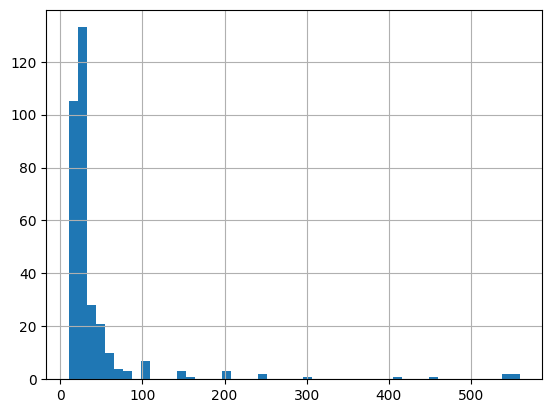

In [76]:
hourlys['pay_from_post'].hist(bins=50)

In [97]:
hourlys.groupby("day")['pay_from_post'].max()

day
08-27-2022    200.000000
08-28-2022    200.000000
08-29-2022    100.000000
08-30-2022    150.000000
08-31-2022     62.500000
09-01-2022     50.000000
09-02-2022    100.000000
09-03-2022    100.000000
09-04-2022     80.000000
09-05-2022     40.000000
09-06-2022     50.000000
09-07-2022    103.333333
09-08-2022     55.000000
09-09-2022     55.000000
09-10-2022     80.000000
09-11-2022     30.000000
09-12-2022     55.000000
09-13-2022    100.000000
09-14-2022    100.000000
09-15-2022     55.000000
09-16-2022    150.000000
09-17-2022    150.000000
09-18-2022     30.000000
09-19-2022    250.000000
09-20-2022     50.000000
09-21-2022     38.000000
09-22-2022    160.000000
09-23-2022     40.000000
09-24-2022     25.000000
09-25-2022     20.000000
09-26-2022    251.250000
Name: pay_from_post, dtype: float64